In [1]:
import numba as nb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy.interpolate import griddata
import os
import shutil
import moviepy as mp

In [2]:
sie = pd.read_csv(f'Output/Sim 1.csv', header=0)
pow = pd.read_csv(f'Output/Sim 2.csv', header=0)
nfw = pd.read_csv(f'Output/Sim 3.csv', header=0)

In [3]:
sie['pos_rms'] = sie['pos_rms'].fillna(1)
pow['pos_rms'] = pow['pos_rms'].fillna(1)
nfw['pos_rms'] = nfw['pos_rms'].fillna(1)
sie['mag_rms'] = sie['mag_rms'].fillna(6000)
pow['mag_rms'] = pow['mag_rms'].fillna(6000)
nfw['mag_rms'] = nfw['mag_rms'].fillna(6000)

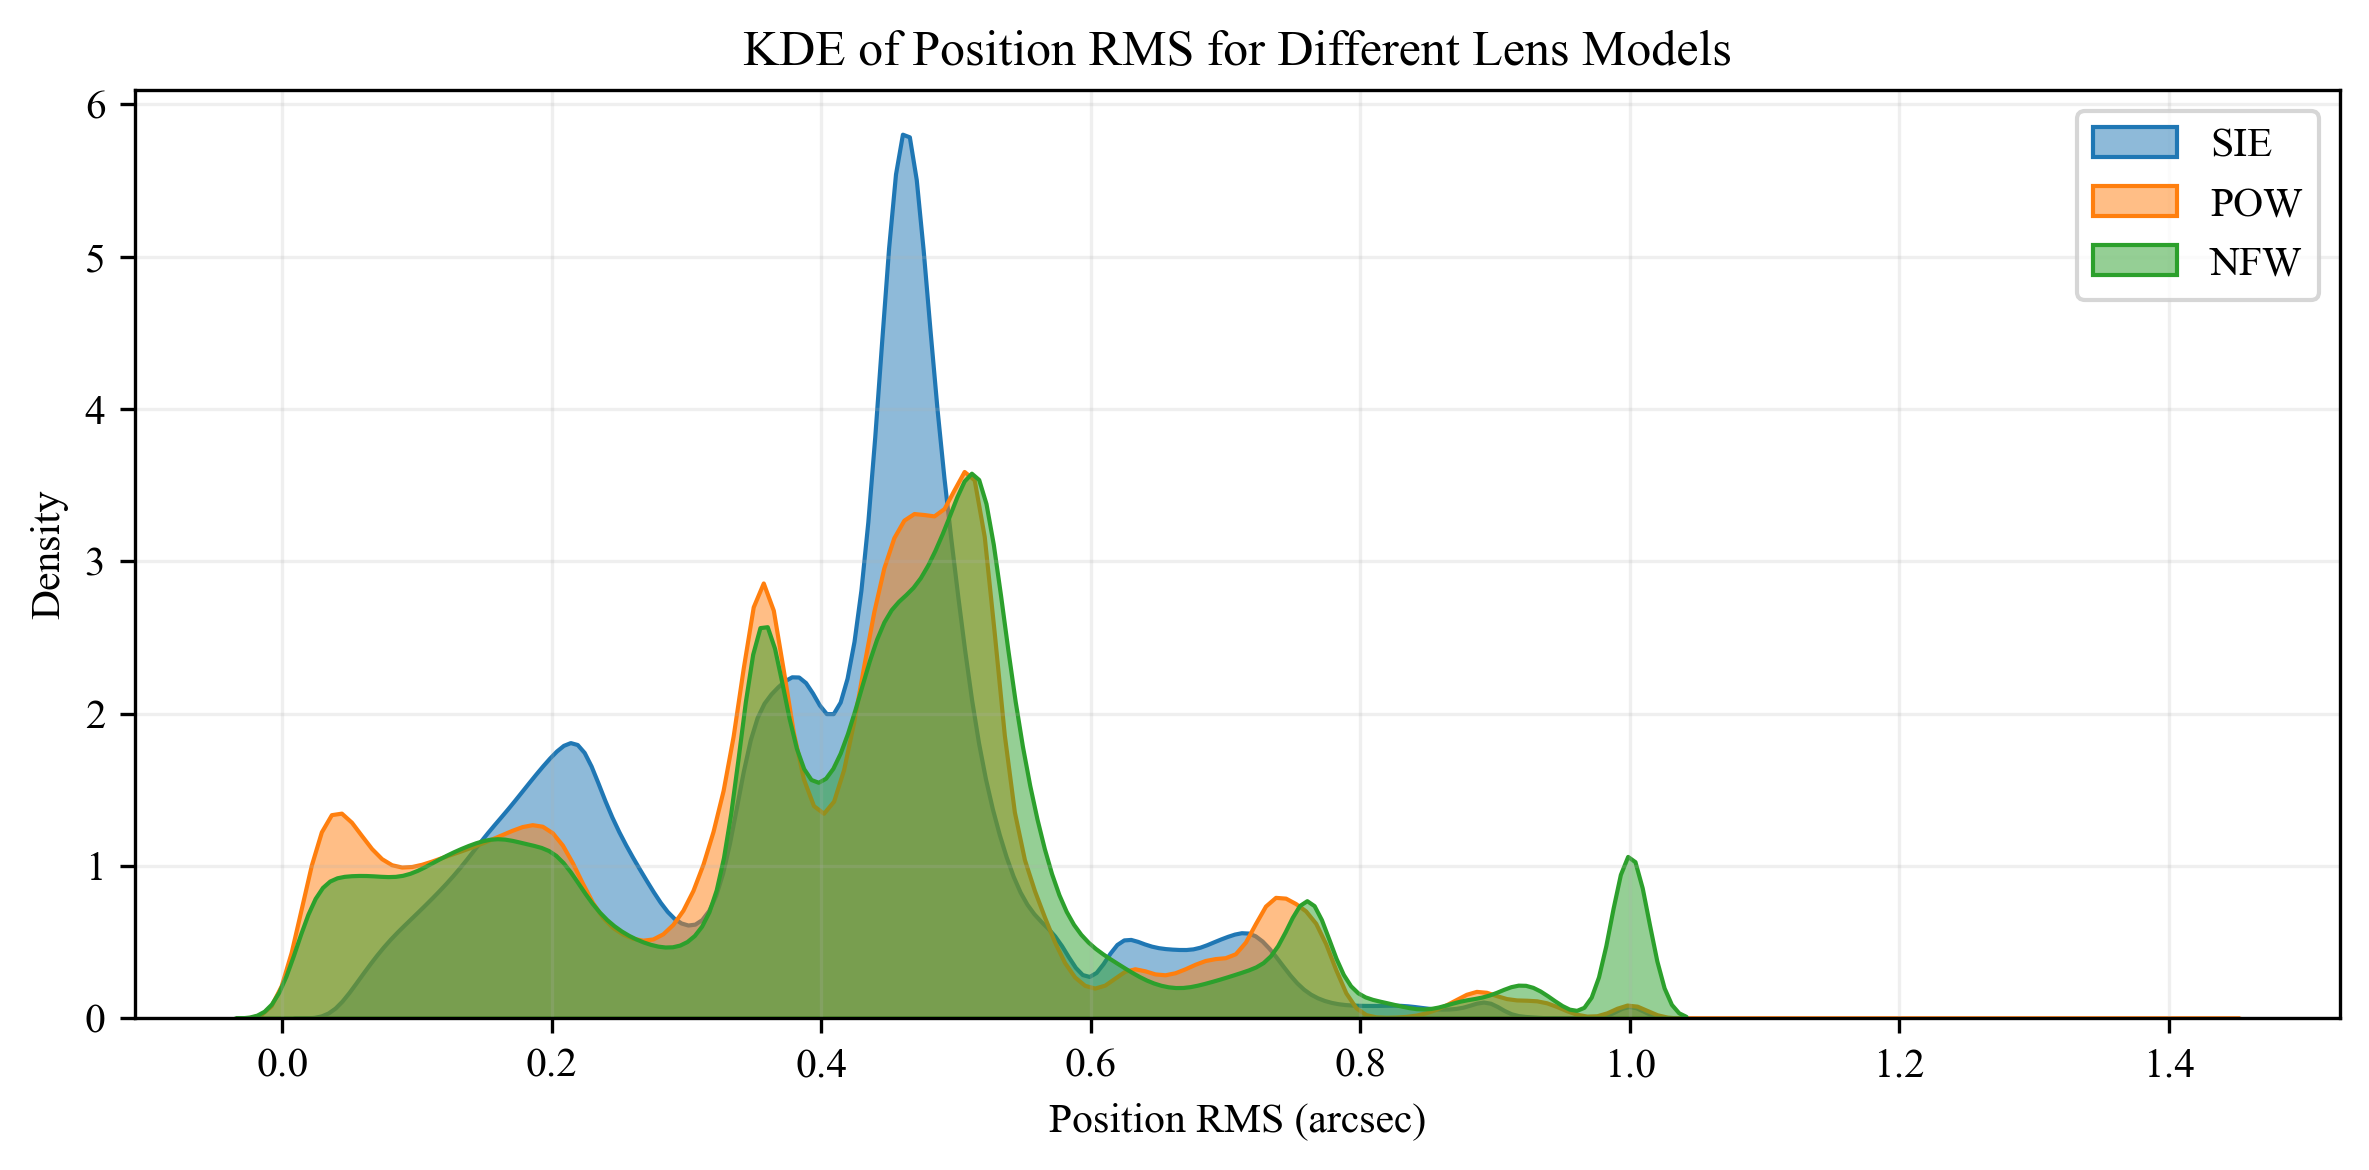

In [5]:
plt.figure(figsize=(8, 4))
sns.kdeplot(sie['pos_rms'], label='SIE', fill=True, alpha=0.5)
sns.kdeplot(pow['pos_rms'], label='POW', fill=True, alpha=0.5)
sns.kdeplot(nfw['pos_rms'], label='NFW', fill=True, alpha=0.5)
plt.xlabel('Position RMS (arcsec)')
plt.ylabel('Density')
plt.title('KDE of Position RMS for Different Lens Models')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

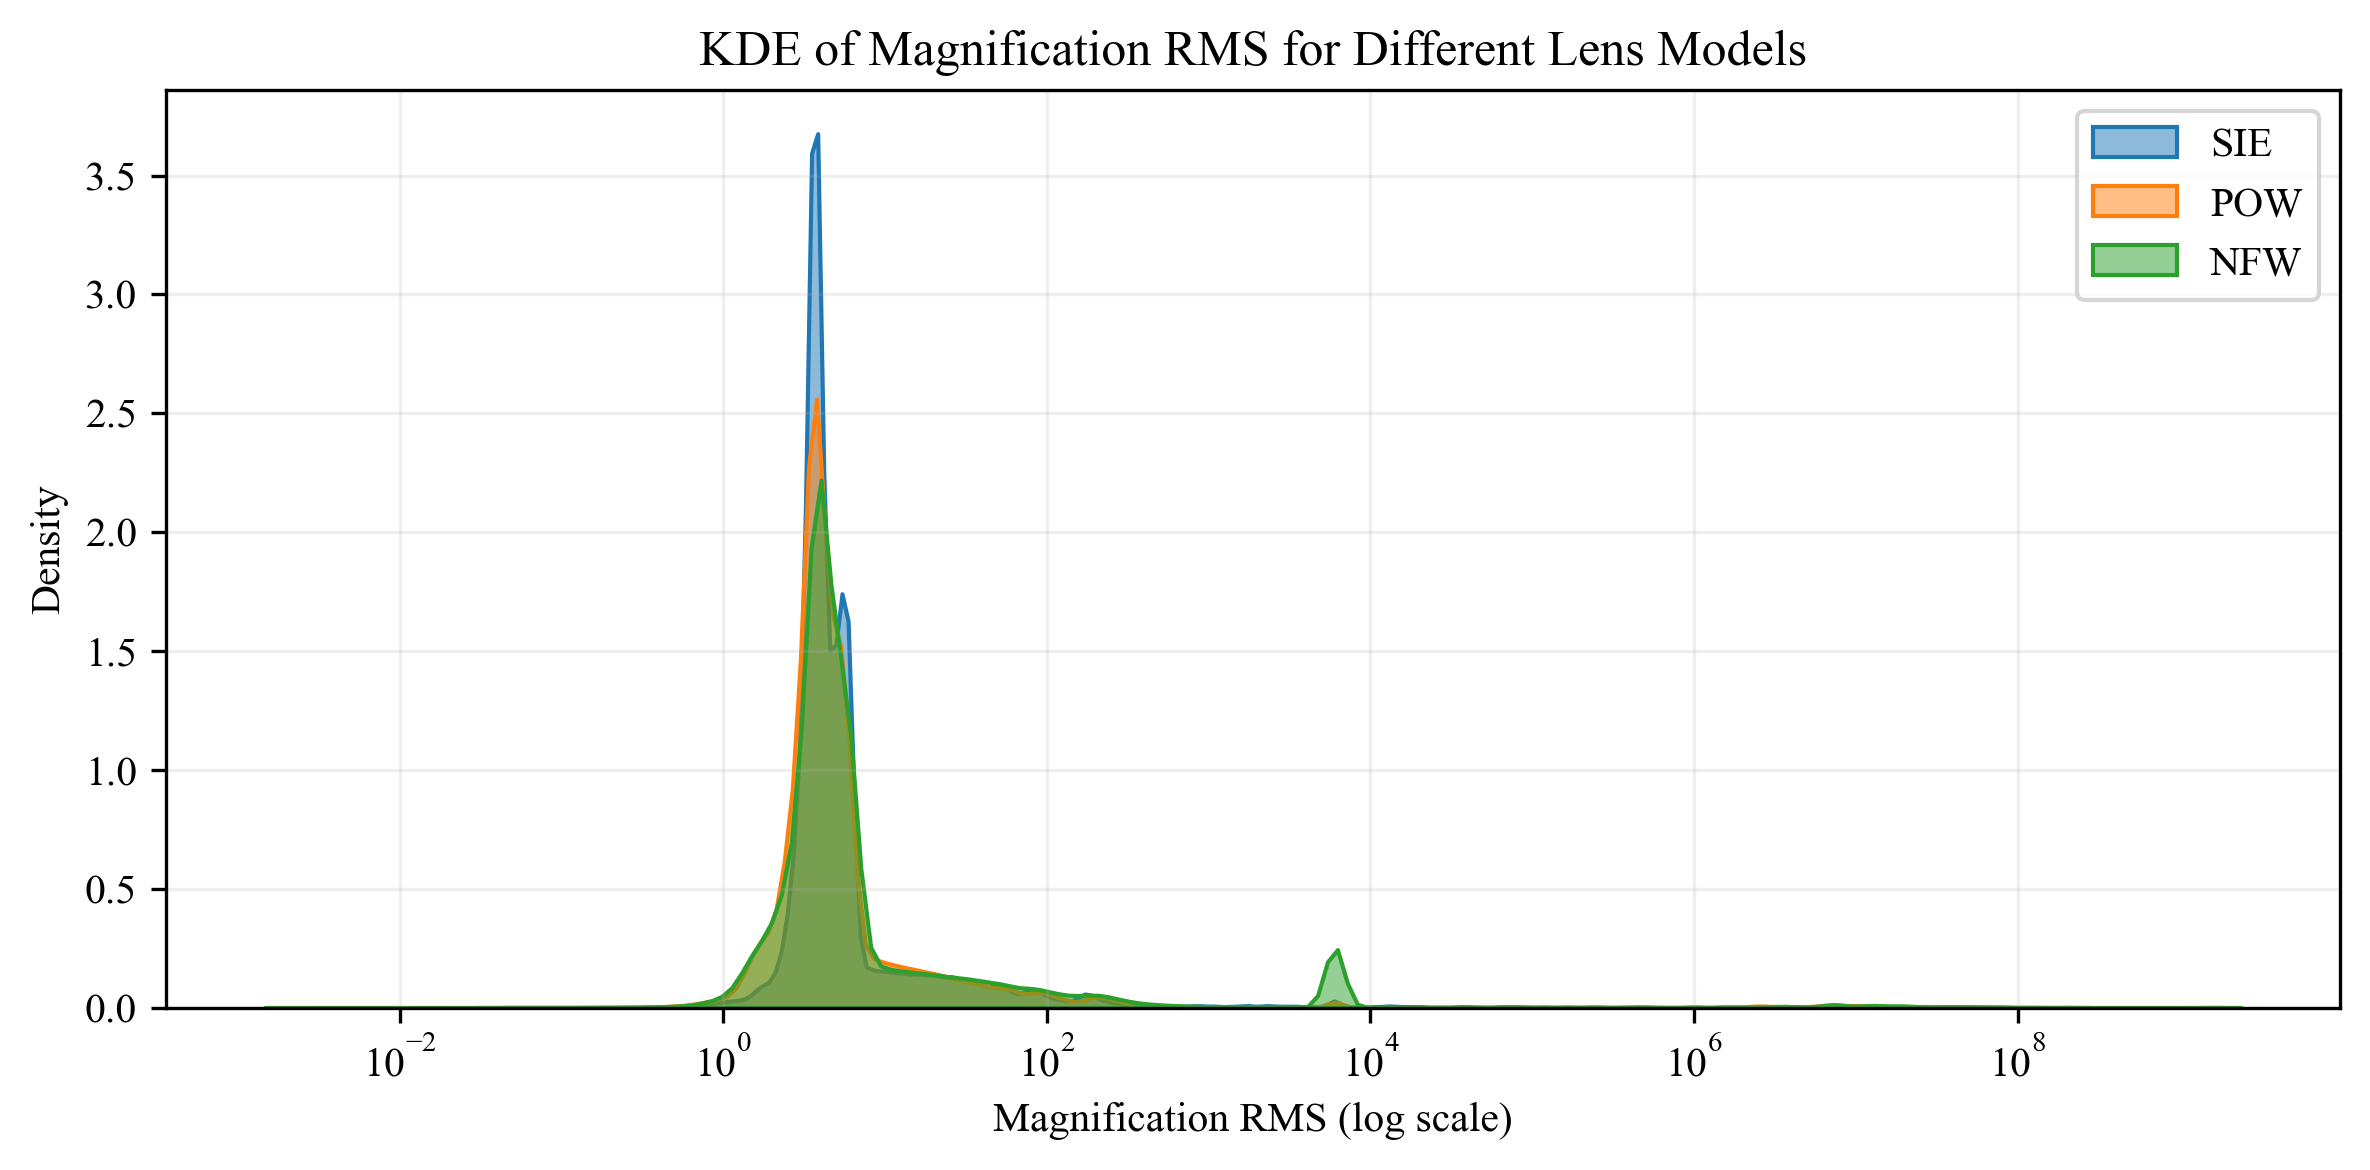

In [11]:
plt.figure(figsize=(8, 4))
sns.kdeplot(sie['mag_rms'], label='SIE', fill=True, alpha=0.5, log_scale=True)
sns.kdeplot(pow['mag_rms'], label='POW', fill=True, alpha=0.5, log_scale=True)
sns.kdeplot(nfw['mag_rms'], label='NFW', fill=True, alpha=0.5, log_scale=True)
plt.xlabel('Magnification RMS (log scale)')
plt.ylabel('Density')
plt.title('KDE of Magnification RMS for Different Lens Models')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

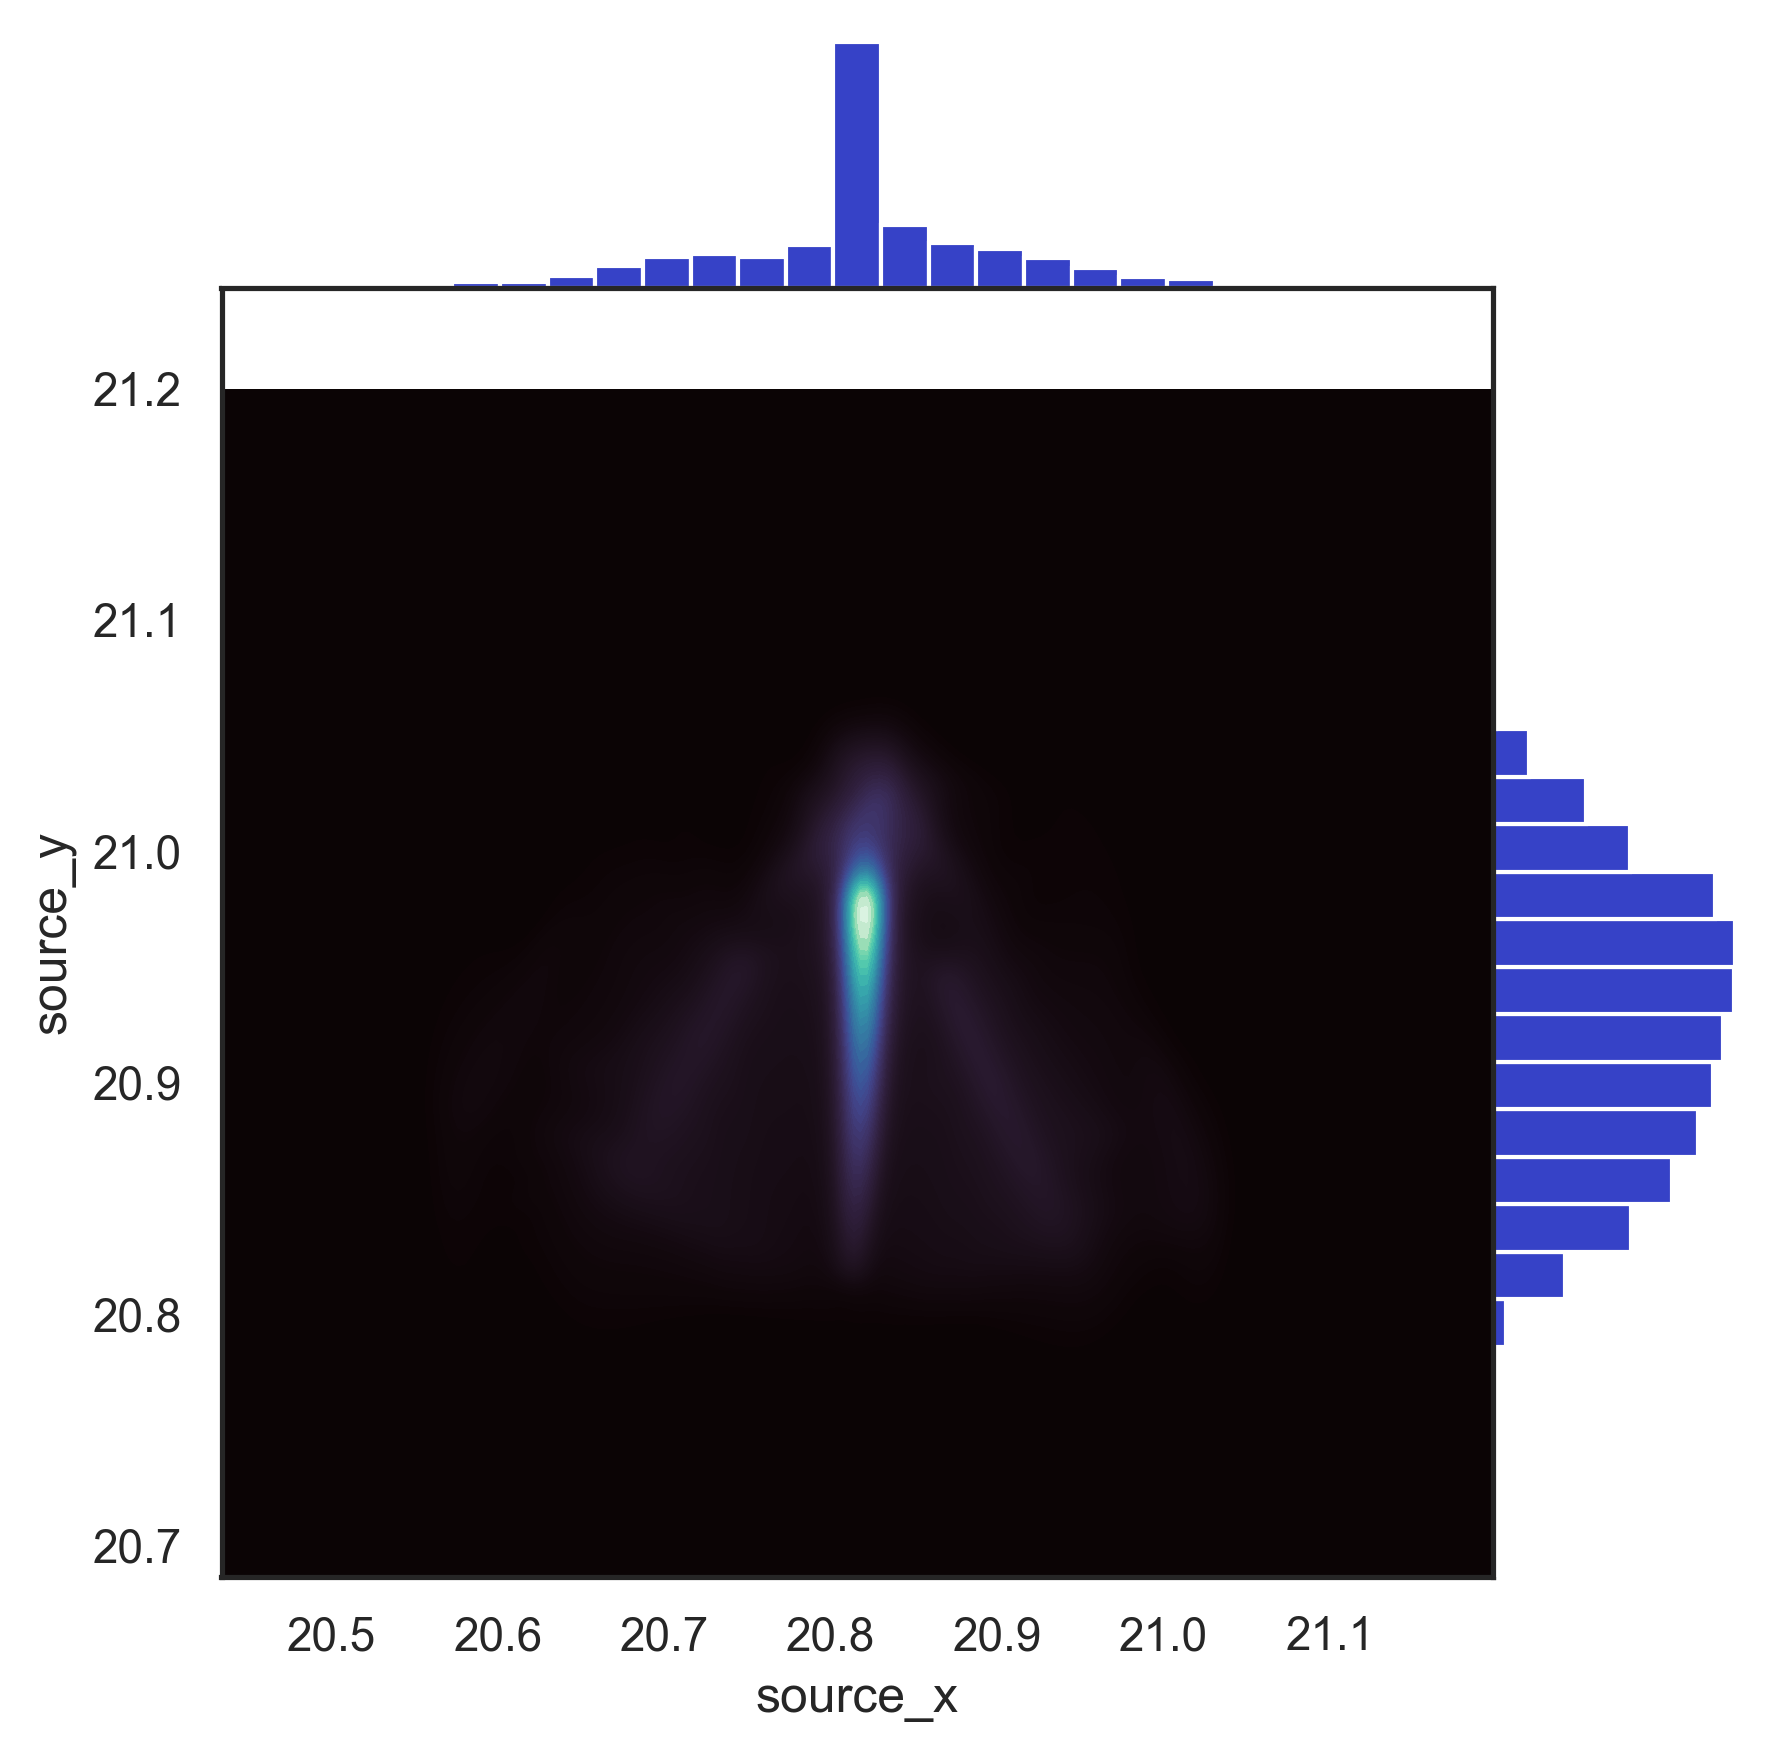

In [20]:
# Source X Joint Grid
sns.set_theme(style="white")
g = sns.JointGrid(data=sie, x="source_x", y="source_y", space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((20.2, 21.2), (20.2, 21.2)),
             thresh=0, levels=100, cmap="mako")
g.plot_marginals(sns.histplot, color="#3642C7", alpha=1, bins=25)

<Axes: xlabel='source_x', ylabel='source_y'>

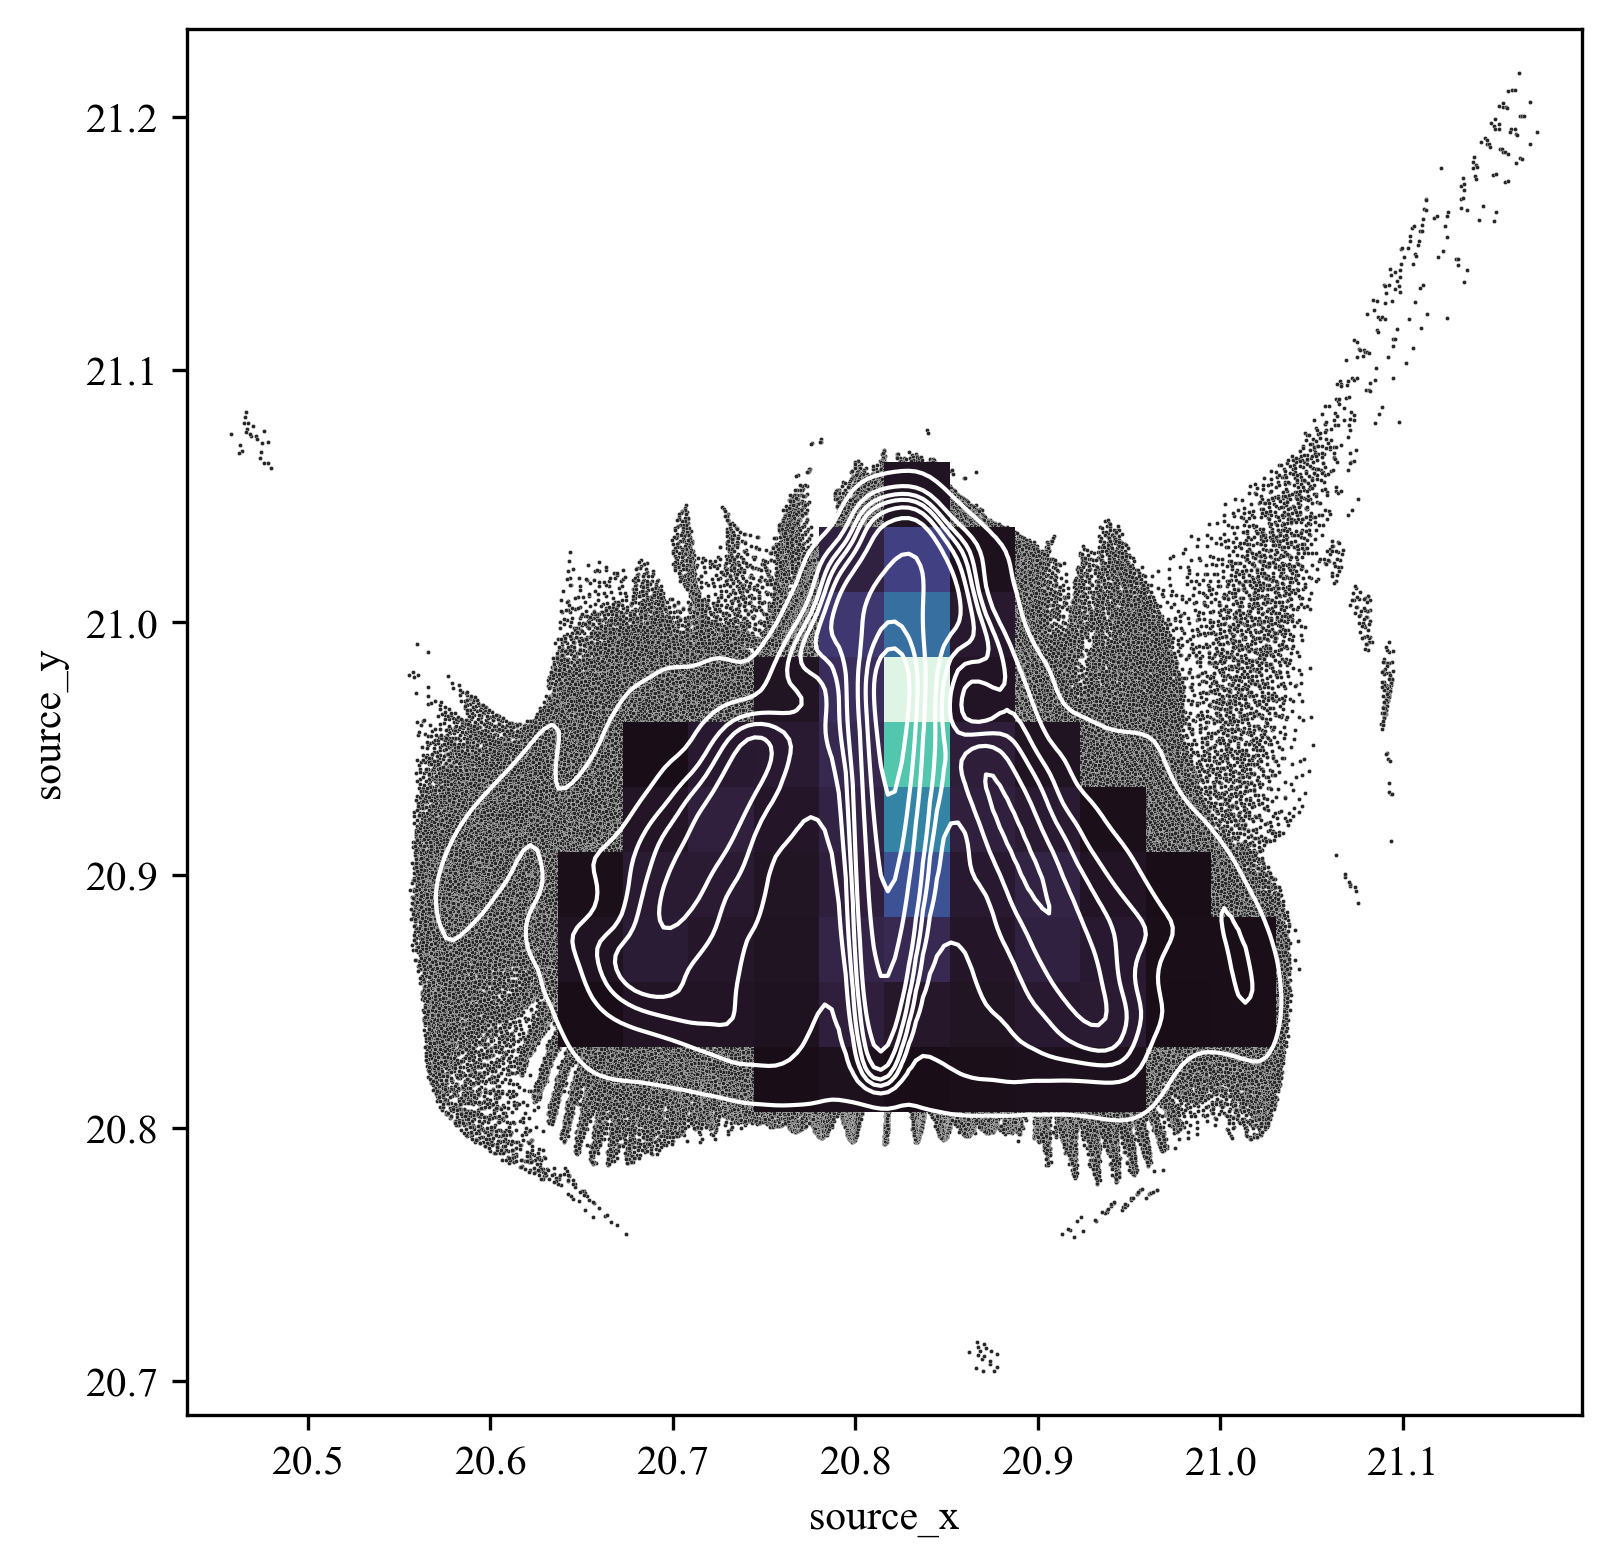

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=sie['source_x'], y=sie['source_y'], s=1, color=".15")
sns.histplot(x=sie['source_x'], y=sie['source_y'], bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=sie['source_x'], y=sie['source_y'], levels=10, color="w", linewidths=1)